In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [7]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


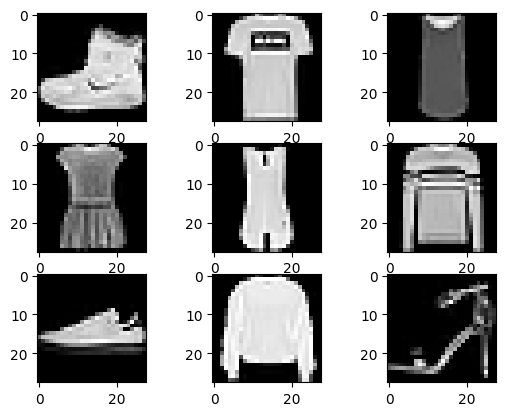

In [7]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
# Preprocessing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [12]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=5)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/5


1875/1875 [==============================] - 10s 4ms/step - loss: 0.5000 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3772 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3394 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3148 - accuracy: 0.8855
Epoch 5/5
313/313 [==============================] - 2s 3ms/step - loss: 0.3550 - accuracy: 0.8727
Test accuracy: 0.8726999759674072


In [13]:
# Training the model
model.fit(X_train, y_train, epochs=10)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2813 - accuracy: 0.8961
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2690 - accuracy: 0.8997
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2591 - accuracy: 0.9043
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2499 - accuracy: 0.9077
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2385 - accuracy: 0.9110
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2302 - accuracy: 0.9145
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2252 - accuracy: 0.9162
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2172 - accuracy: 0.9181
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2116 - accuracy: 0.9195
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.

In [14]:
# Making predictions with the model
predictions = model.predict(X_test)

# Printing the shape of the predictions array
print(predictions.shape)

# Printing the first 10 predictions
print(predictions[:10])

# Converting the predictions to class labels
class_labels = [tf.argmax(prediction) for prediction in predictions]

# Printing the first 10 class labels
print(class_labels[:10])

313/313 [==============================] - 1s 3ms/step
(10000, 10)
[[7.57410934e-09 1.91118718e-11 9.35127975e-09 2.15023073e-12
  1.35227029e-11 7.51273939e-04 2.73985592e-07 8.14823806e-03
  2.01255124e-09 9.91100252e-01]
 [9.74697250e-05 7.00479042e-17 9.99527931e-01 4.21182143e-12
  3.43475811e-04 1.16659139e-11 3.10548639e-05 3.06364533e-14
  5.67820834e-12 9.20984514e-15]
 [1.04878510e-11 1.00000000e+00 8.40345622e-15 3.50632094e-13
  7.57253255e-13 4.87281306e-23 4.51664612e-13 1.67250712e-31
  7.40897237e-18 1.85212361e-23]
 [9.37114067e-11 1.00000000e+00 6.39372930e-12 9.27068200e-10
  9.30809735e-11 2.03399108e-21 7.88710416e-12 1.56906837e-29
  4.23914960e-15 3.74231321e-19]
 [1.25921786e-01 4.96934993e-11 5.66679379e-03 3.77835240e-05
  2.53895676e-04 7.87196495e-06 8.68109584e-01 3.61355887e-07
  1.75759897e-06 1.38144259e-07]
 [2.28971242e-08 1.00000000e+00 1.95358955e-11 4.29564717e-10
  1.42732381e-10 4.90190695e-19 4.85328577e-09 8.62590054e-24
  1.24497125e-15 1.16851

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5049 - accuracy: 0.8222 - val_loss: 0.3981 - val_accuracy: 0.8568
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3803 - accuracy: 0.8623 - val_loss: 0.3623 - val_accuracy: 0.8744
Epoch 3/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3418 - accuracy: 0.8760 - val_loss: 0.3693 - val_accuracy: 0.8698
Epoch 4/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3168 - accuracy: 0.8834 - val_loss: 0.3267 - val_accuracy: 0.8808
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2978 - accuracy: 0.8896 - val_loss: 0.3232 - val_accuracy: 0.8792
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2840 - accuracy: 0.8950 - val_loss: 0.2982 - val_accuracy: 0.8930
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2693 - accuracy: 0.8994 - val_loss: 0.3102 - val_acc

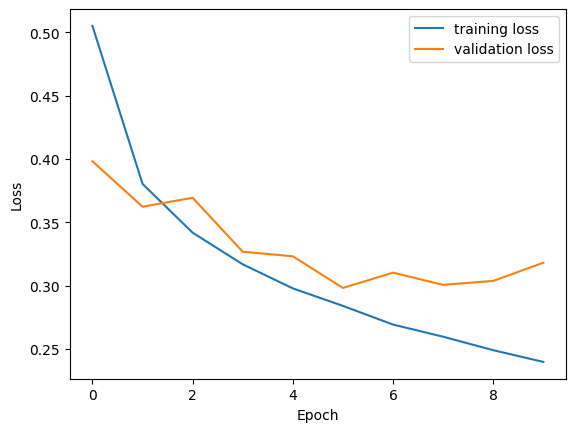

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocessing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Spliting the training data into training and validation sets
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

# Ploting the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

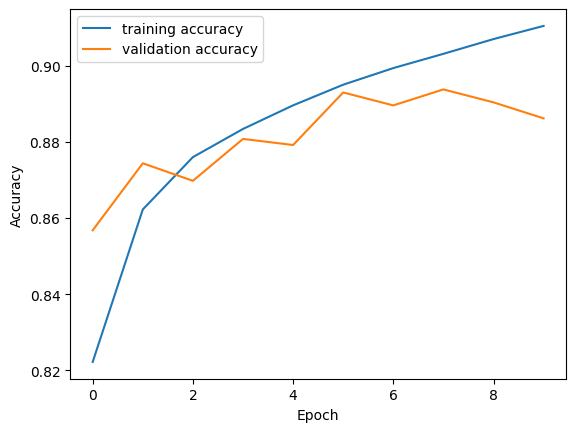

In [16]:
# Ploting the training and validaion accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
# Evaluating the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.3479 - accuracy: 0.8799
Test loss: 0.34792259335517883
Test accuracy: 0.8798999786376953
